# [Lab Session 2](otsu.ipynb)

In [5]:
import numpy as np
import matplotlib.pyplot as plt

**[Task 2.1.]()** Implement Otsu thresholding as a re-usable function:

In [30]:
def otsu_thresholding(imgf):
    img8 = (imgf * 255).round().astype(np.uint8)
    bins=np.zeros(256, dtype=int)

    x=0
    for x,j in np.ndindex((img8.shape[0]),(img8.shape[1])):
        x=img8[x,j]
        bins[x]=bins[x]+1

    pen= np.zeros(256)
    for i in range(0,256):
        g_klein = bins[0:i]
        g_groß = bins[i:256]
        g_k=g_klein.sum()
        g_g=g_groß.sum()
        sigma1=np.var(img8[img8<i])
        sigma2=np.var(img8[img8>=i])
        pen[i]=g_k*sigma1+g_g*sigma2

    pen1=pen[~np.isnan(pen)]
    min_pen=min(pen1)
    #print(min_pen)
    minim=np.where(pen == min_pen)[0][0]
    otsu_img=(img8>=minim)
    print(minim)
    return(otsu_img)

**[Task 2.2.]()** Implement a re-usable function to compute the Dice coefficient:

In [34]:
def compute_dice(bin1, bin2):
    assert bin1.dtype == bool
    assert bin2.dtype == bool
    dice= 2*np.sum(bin1*bin2)/(bin1.sum()+bin2.sum())
    
    return(dice)

**[Task 2.3.]()** Test your implementations from above:

/usr/local/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.12/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/usr/local/lib/python3.12/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


31
0.8943783223933183


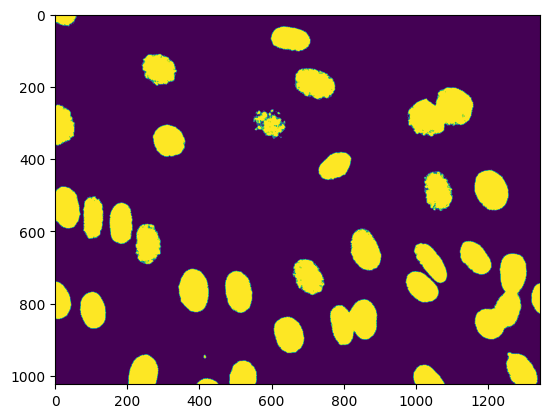

In [ ]:
gt=plt.imread('data/NIH3T3/gt/0.png').astype(bool)

img=plt.imread('data/NIH3T3/im/dna-0.png')

otsu_i= otsu_thresholding(img)
#print(minim)
plt.imshow(otsu_img)
dicescore=compute_dice(otsu_i, gt)
#print(threshold)
print(dicescore)

The result should be the same as in your [otsu.ipynb](otsu.ipynb) notebook.

**[Task 2.4.]()** Perform batch processing:

/usr/local/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.12/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/usr/local/lib/python3.12/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


35
0.7528567225654604
41
0.647632667167185
71
0.42998864378556173
67
0.5789127665023891
75
0.07605520913993832
46
0.7965485556767932


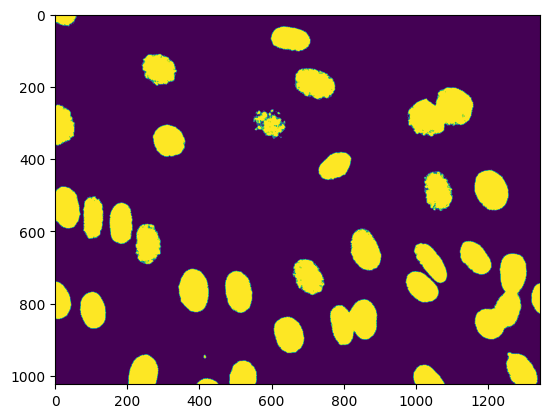

In [38]:
numerbs=[28,29,33,44,46,49]
for i in numerbs:
    gt=plt.imread(f'data/NIH3T3/gt/{i}.png').astype(bool)
    img=plt.imread(f'data/NIH3T3/im/dna-{i}.png')
    otsu_i= otsu_thresholding(img)
    #print(minim)
    plt.imshow(otsu_img)
    dicescore=compute_dice(otsu_i, gt)
    #print(threshold)
    print(dicescore)
    